# T08 - Distribuciones de Probabilidad

René Alejandro González Velázquez

Ingenieria Civil - 752235

24 de octubre de 2024

1.- Un proyecto de construcción está por comenzar. Se hace la compra de los materiales y el proveedor dice que en promedio tardan una semana con una desviación de 3 días en llegar. Una vez llegados los materiales se tarda entre 3 y 5 semanas en construir (uniforme). Después de la construcción se deben esperar 3 días antes de empezar a pintar, y toma 6 días en promedio con 2 días de desviación estándar hacerlo.

a) Describe en una celda qué distribución usarías para cada paso del proceso

b) Simula cada paso en el proceso un millón de veces

c) Agrupa las simulaciones de cada paso para tener la simulación del proceso completo

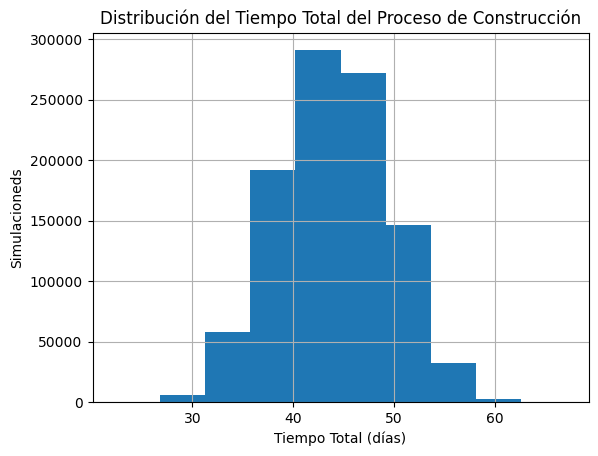

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000000

materiales = np.random.normal(7, 3, size = n)
construccion = np.random.uniform(21, 35, size = n)
espera = 3
pintura = np.random.normal(6, 2, size = n)

tiempo = materiales + construccion + espera + pintura

plt.figure()
plt.hist(tiempo)
plt.title('Distribución del Tiempo Total del Proceso de Construcción')
plt.xlabel('Tiempo Total (días)')
plt.ylabel('Simulacioneds')
plt.grid()
plt.show()


d) ¿Cuál es el tiempo promedio para de inicio-fin del proyecto?

In [17]:
promedio = np.mean(tiempo)
promedio

44.00164679895862

El promedio de las simulaciones es de 44 dias

e) De acuerdo a tus simulaciones, ¿cuál es el peor caso? ¿cuál es el mejor caso?

In [18]:
mejor = np.min(tiempo)
peor = np.max(tiempo)

mejor, peor

(22.341313060165522, 67.0482289733007)

El mejor caso es de 22 dias y el peor caso es de 67 dias

f) Si el proyecto se tiene que entregar a más tardar en 50 días o se tiene que pagar una compensación al cliente, ¿cuál es la probabilidad de que el proyecto se entregue a tiempo?

In [13]:
proyecto_a_tiempo = np.sum(tiempo <= 50)
probabilidad = proyecto_a_tiempo / n
probabilidad

0.857522

Existe una probabilidad de 85% de que el proyecto se entregue a tiempo

g) ¿Cuál es la probabilidad de que el proyecto tome entre 20 y 40 días?

In [16]:
proyecto = np.sum((tiempo >= 20) & (tiempo <= 40))
probabilidad1 = proyecto / n 
probabilidad1

0.243166

La probabilidad que hay de que el proyecto se entregue entre 20 y 40 dias, es del 24%

2.- Hay un elevador pequeño en una plaza donde se espera que entren máximo 4 personas a la vez, y su capacidad de peso para poder operar es de 300 kg. En el último censo se encontró que habían 378350 personas en la zona:

    185392 mujeres
    162690 hombres
    30268 personas que o prefirieron no dar la información o se identificaron como no binarias

El peso promedio medido en mujeres es de 70 kg con una desviación estándar de 11 kg. En los hombres se midió un peso promedio de 80 kg y una desviación estándar de 16 kg. En el tercer grupo se midió un peso promedio de 73 kg con una desviación estándar de 12 kg.

a) Si el elevador se llenara 10,000 veces, ¿cuántas de esas veces se excedería el peso permitido?

b) ¿Qué peso total tendría que soportar el elevador si se quiere que el 95% de las veces que se llene no se exceda el peso permitido?

In [21]:
import numpy as np

personas = 378350
cantidad = {
    'mujeres': 185392 / personas,
    'hombres': 162690 / personas,
    'no_binarios': 30268 / personas
}

peso = {
    'mujeres': {'media': 70, 'std': 11},
    'hombres': {'media': 80, 'std': 16},
    'no_binarios': {'media': 73, 'std': 12}
}

s = 1000000

pesosm = np.random.normal(peso['mujeres']['media'], 
                                  peso['mujeres']['std'], 
                                  int(s * cantidad['mujeres']))

pesosh = np.random.normal(peso['hombres']['media'], 
                                  peso['hombres']['std'], 
                                  int(s * cantidad['hombres']))

pesosn = np.random.normal(peso['no_binarios']['media'], 
                                      peso['no_binarios']['std'], 
                                      int(s * cantidad['no_binarios']))

pesos = np.concatenate([pesosm, pesosh, pesosn])

grupo_max= 4
peso_max = 300



In [25]:
n = 10000
grupos_peso = np.random.choice(pesos, (n, grupo_max))
peso_total = grupos_peso.sum(1)

excedidos = np.sum(peso_total > peso_max)
excedidos

4603

b) ¿Qué peso total tendría que soportar el elevador si se quiere que el 95% de las veces que se llene no se exceda el peso permitido?

No supe como hacerlo...

3.- Tienes diez dados justos. Si arrojas todos al mismo tiempo, ¿cuál es la probabilidad de que la suma de los dados sea múltiplo de 6?

In [29]:
import numpy as np

s = 100000
d = 10
tirada = np.random.randint(1, 7, (s, d))
suma = tirada.sum(1)
multiplo = np.sum(suma % 6 == 0)

probabilidad = multiplo / s
probabilidad

0.16804

La probabilidad de que la suma de los dados sea multimplo de 6 es del 16% 

4.- A y B juegan al siguiente juego: un número k del 1 al 6 es elegido, y A y B avientan el dado por turnos hasta que alguien consiga que el dado caiga en k. El ganador recibe $100.

a) ¿Cuál es la probabilidad de que el primer jugador gane?

b) ¿Cuál es la probabilidad de que el segundo jugador gane?

In [30]:
import numpy as np

n = 100000
k = np.random.randint(1, 7)
A = 0
B = 0

for _ in range(n):
    turno = 0  
    while True:
        dado = np.random.randint(1, 7)
        
        if dado == k:
            if turno == 0: 
                A += 1
            else: 
                B += 1
            break

        turno = 1 - turno  

probabilidad_A = A / n
probabilidad_B = B / n

probabilidad_A, probabilidad_B

(0.54359, 0.45641)

La probabilidad de que el primer jugador gane es de 54% y de la que el segundo jugador gane es del 45%

c) ¿Cuánto vale la pena pagar para ir primero?

In [33]:
ganancia = 100

Ag = probabilidad_A * ganancia
Bg = probabilidad_B * ganancia

valor = Ag - Bg

valor

8.718000000000004

Vale la pena hasta $8.72 